# Study On Bank Loan approval

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_excel(r"C:\Users\Siddhant\OneDrive\Desktop\Exam Material\Bank_Personal_Loan_Modelling.xlsx")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df=df.drop("ID",axis=1)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [6]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
df["CCAvg"].value_counts(normalize=True)*100         #Average spending on CC in thousand

CCAvg
0.300000    4.82
1.000000    4.62
0.200000    4.08
2.000000    3.76
0.800000    3.74
            ... 
3.250000    0.02
3.666667    0.02
4.666667    0.02
8.900000    0.02
2.750000    0.02
Name: proportion, Length: 108, dtype: float64

In [9]:
df["Family"].value_counts(normalize=True)*100

Family
1    29.44
2    25.92
4    24.44
3    20.20
Name: proportion, dtype: float64

### Relation between count of number of family member and does have personal loan

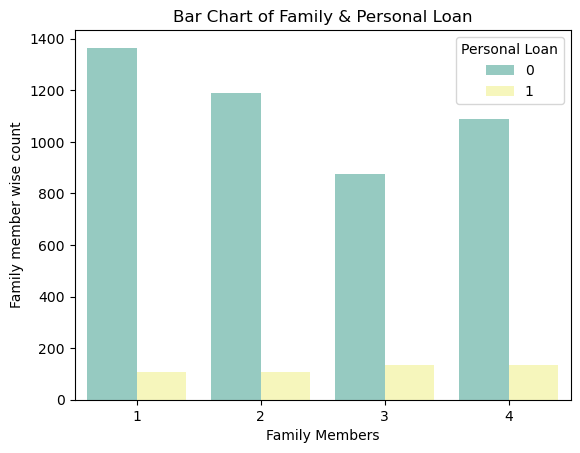

In [10]:
# Barplot for count of number of family member and does have personal loan
sns.countplot(x="Family",data=df,hue="Personal Loan",palette="Set3")
plt.xlabel("Family Members")
plt.ylabel("Family member wise count")
plt.title('Bar Chart of Family & Personal Loan')
plt.show()

In [11]:
#Conclusion :
'''Family size does not have any impact in personal loan.
But it seems families with size of 3 are more likely to take loan.'''

'Family size does not have any impact in personal loan.\nBut it seems families with size of 3 are more likely to take loan.'

### To Study CD account along with personal Loan

<Axes: xlabel='CD Account', ylabel='count'>

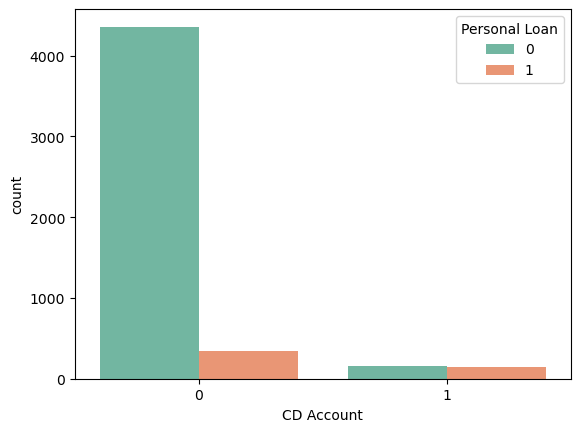

In [12]:
sns.countplot(x="CD Account",data=df,hue="Personal Loan",palette="Set2")

In [13]:
#Conclusion :
'''Customers who does not have CD account , does not have loan as well.There is a majority.
But almost all customers who has CD account has loan as well'''

'Customers who does not have CD account , does not have loan as well.There is a majority.\nBut almost all customers who has CD account has loan as well'

### To study Average credit card spending per month (In thousands)

In [14]:
df["CCAvg"].value_counts(normalize=True)*100

CCAvg
0.300000    4.82
1.000000    4.62
0.200000    4.08
2.000000    3.76
0.800000    3.74
            ... 
3.250000    0.02
3.666667    0.02
4.666667    0.02
8.900000    0.02
2.750000    0.02
Name: proportion, Length: 108, dtype: float64

In [15]:
print(f"Size of having Average spending on credit card/:",{len(df[(df["CCAvg"]>=0)&(df["CCAvg"]<2)])})
print("Size of having Average spending on credit card/:",{len(df[(df["CCAvg"]>=2)&(df["CCAvg"]<4)])})
print("Size of having Average spending on credit card/:",{len(df[(df["CCAvg"]>=4)&(df["CCAvg"]<6)])})
print("Size of having Average spending on credit card/:",{len(df[(df["CCAvg"]>=6)&(df["CCAvg"]<8)])})
print("Size of having Average spending on credit card/:",{len(df[(df["CCAvg"]>=8)&(df["CCAvg"]<10)])})

Size of having Average spending on credit card/: {3059}
Size of having Average spending on credit card/: {1358}
Size of having Average spending on credit card/: {316}
Size of having Average spending on credit card/: {216}
Size of having Average spending on credit card/: {48}


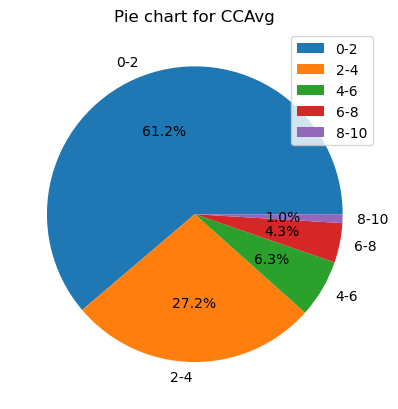

In [16]:
#Pie chart for CCAvg
labels =['0-2','2-4','4-6','6-8','8-10']
x = [3059,1358,316,216,48] 
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.title("Pie chart for CCAvg")
plt.legend(loc=1)

In [17]:
'''Here We can see that 61% people spend 0 to 2000 per month '''

'Here We can see that 61% people spend 0 to 2000 per month '

### Relation of personal Loan with age income and CCAvg

In [18]:
df1=df[["Personal Loan", "Age", "Income", "CCAvg"]]

In [19]:
df2=df1.corr()
print(df2)

               Personal Loan       Age    Income     CCAvg
Personal Loan       1.000000 -0.007726  0.502462  0.366891
Age                -0.007726  1.000000 -0.055269 -0.052030
Income              0.502462 -0.055269  1.000000  0.645993
CCAvg               0.366891 -0.052030  0.645993  1.000000


In [20]:
df3=df2["Personal Loan"][1::]
print(df3)

Age      -0.007726
Income    0.502462
CCAvg     0.366891
Name: Personal Loan, dtype: float64


<Axes: >

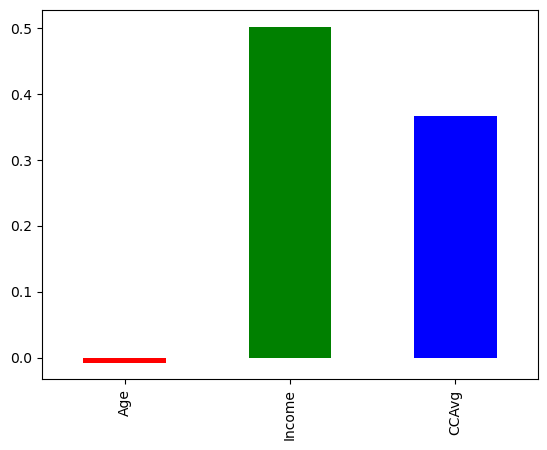

In [21]:
df3.plot.bar(color=["r","g","b","y"])

In [22]:
'''
We can say that only 'Income' has high relation with 'Personal Loan'
'''

"\nWe can say that only 'Income' has high relation with 'Personal Loan'\n"

### Classification

In [23]:
classification_df=df[["Income","Family","CCAvg","Personal Loan","Securities Account","CD Account","Online","CreditCard"]]

In [24]:
classification_df.head()

,Income,Family,CCAvg,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,49,4,1.6,0,1,0,0,0
1,34,3,1.5,0,1,0,0,0
2,11,1,1.0,0,0,0,0,0
3,100,1,2.7,0,0,0,0,0
4,45,4,1.0,0,0,0,0,1


In [25]:
classification_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0
CreditCard,5000.0,0.294000,0.455637,0.0,0.0,0.0,1.0,1.0


In [26]:
#Heatmap

<Axes: >

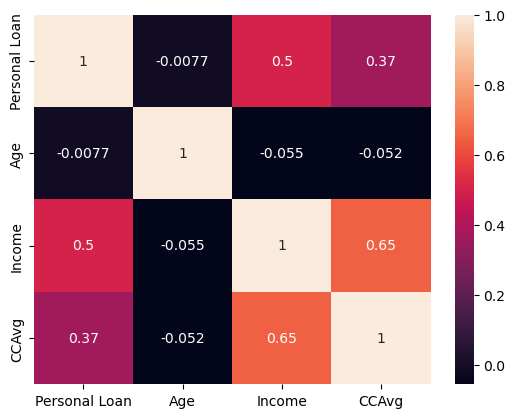

In [27]:
sns.heatmap(df1.corr(),annot=True)

In [28]:
#Pairplot

C:\Users\Siddhant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


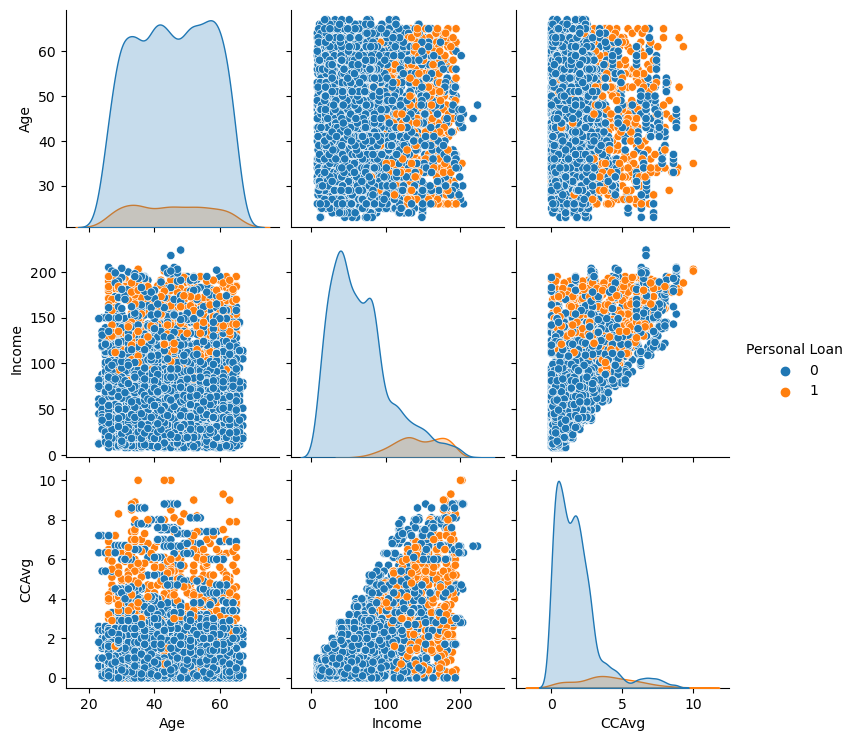

In [29]:
sns.pairplot(df1,hue="Personal Loan")

### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [31]:
y=classification_df["Personal Loan"]
x=classification_df.drop("Personal Loan",axis=1)

In [32]:
#to create train test split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [34]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (3500, 7)
X_test: (1500, 7)
Y_train: (3500,)
Y_test: (1500,)


In [35]:
### Create Decision Tree Classifier model

In [36]:
model=DecisionTreeClassifier()

In [37]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_true,y_pred=y_test,model.predict(x_test)

In [39]:
print(y_true),print(y_pred)

2764    0
4767    0
3814    0
3499    0
2735    0
       ..
4140    0
3969    0
2535    0
1361    0
1458    0
Name: Personal Loan, Length: 1500, dtype: int64
[0 0 0 ... 0 0 0]


(None, None)

In [40]:
accuracy_score(y_true,y_pred)*100

94.06666666666666

In [41]:
model.score(x_train,y_train)*100              #Decision tree score for trainng model

99.97142857142856

In [42]:
model.score(x_test,y_test)*100                #Decision tree score for testing model

94.06666666666666

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1314,   37],
       [  52,   97]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Label')

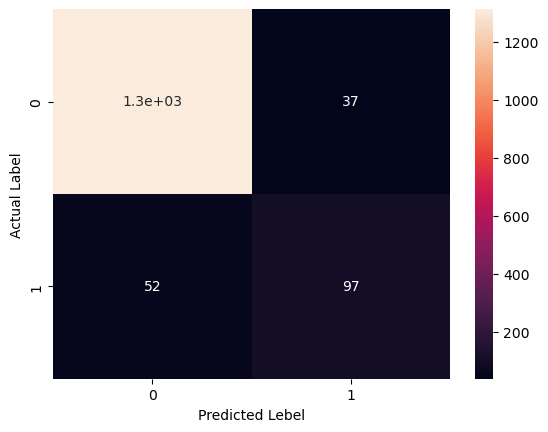

In [45]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Lebel")
plt.ylabel("Actual Label")

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1351
           1       0.72      0.65      0.69       149

    accuracy                           0.94      1500
   macro avg       0.84      0.81      0.83      1500
weighted avg       0.94      0.94      0.94      1500



### SVC

In [48]:
from sklearn.svm import SVC

In [49]:
svc=SVC(kernel="linear",probability=True)

In [50]:
svc.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

In [51]:
#train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [53]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (3500, 7)
X_test: (1500, 7)
Y_train: (3500,)
Y_test: (1500,)


In [54]:
y_true,y_pred=y_test,model.predict(x_test)

In [55]:
print(y_true),print(y_pred)

2764    0
4767    0
3814    0
3499    0
2735    0
       ..
4140    0
3969    0
2535    0
1361    0
1458    0
Name: Personal Loan, Length: 1500, dtype: int64
[0 0 0 ... 0 0 0]


(None, None)

In [56]:
svc.score(x_train,y_train)*100                 ##svc score of Training dataset

94.08571428571429

In [57]:
svc.score(x_test,y_test)*100                   ##svc score of Testing dataset

93.26666666666667

In [58]:
accuracy_score(y_test,y_pred)*100

94.06666666666666

In [59]:
cm1=print(confusion_matrix(y_true,y_pred))

[[1314   37]
 [  52   97]]


In [60]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1351
           1       0.72      0.65      0.69       149

    accuracy                           0.94      1500
   macro avg       0.84      0.81      0.83      1500
weighted avg       0.94      0.94      0.94      1500



### Random Forest Classifiers

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf=RandomForestClassifier()

In [63]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
y_true,y_pred=y_test,rf.predict(x_test)

In [65]:
accuracy_score(y_true,y_pred)*100

95.0

In [66]:
cm1=confusion_matrix(y_true,y_pred)
print(cm1)

[[1337   14]
 [  61   88]]


<Axes: >

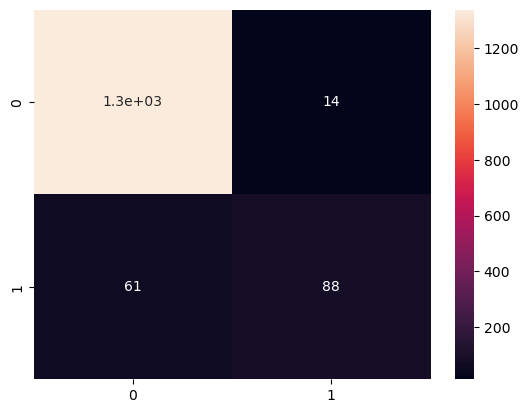

In [67]:
sns.heatmap(cm1,annot=True)

In [68]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.86      0.59      0.70       149

    accuracy                           0.95      1500
   macro avg       0.91      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500



## Conclusion